In [78]:
import torch
from torch import nn

# Setup device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device
# Setup random seed
RANDOM_SEED = 42

In [79]:
from sklearn.datasets import make_moons
NUM_SAMPLES= 1000
X,y = make_moons(NUM_SAMPLES, noise=0.1, random_state=RANDOM_SEED)
X[:10] , y[:10]

(array([[-0.05146968,  0.44419863],
        [ 1.03201691, -0.41974116],
        [ 0.86789186, -0.25482711],
        [ 0.288851  , -0.44866862],
        [-0.83343911,  0.53505665],
        [ 0.61370557, -0.24236929],
        [ 0.2864947 , -0.20127661],
        [-0.05610416,  0.4770791 ],
        [ 1.60421687, -0.30354141],
        [ 0.70964149,  0.85886674]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [80]:
import pandas as pd
data_df=pd.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "Y":y
})

data_df.head()

,X0,X1,Y
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0


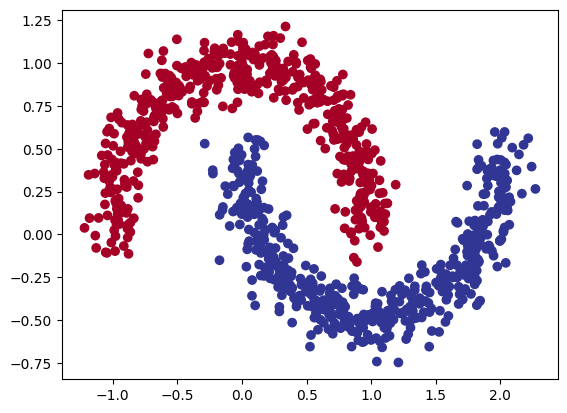

In [81]:
# @title X0 vs X1
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [82]:
X= torch.tensor(X, dtype= torch.float)
y= torch.tensor(y, dtype= torch.float)

from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_SEED
)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [83]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
      super().__init__()
      self.layer1= nn.Linear(in_features=2, out_features=10)
      self.layer2=nn.Linear(in_features=10, out_features=10)
      self.layer3=nn.Linear(in_features=10, out_features=1)
      self.relu = nn.ReLU()

    def forward(self, x):
        ## Your code here ##

        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

# Instantiate the model
## Your code here ##
model0= MoonModelV0().to(device)
model0

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [84]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, 

In [85]:
loss_fn= torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params= model0.parameters(),
                           lr=0.2 )

In [86]:
y_logits= model0(X_test.to(device)[:10])
y_logits

tensor([[ 3.3151e-02],
        [ 3.5847e-02],
        [-3.0447e-03],
        [ 3.7900e-02],
        [ 9.7156e-05],
        [ 1.4751e-03],
        [ 3.6681e-02],
        [ 2.9405e-02],
        [-1.0985e-02],
        [ 2.5357e-02]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [87]:
y_pred_prob= torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.5083],
        [0.5090],
        [0.4992],
        [0.5095],
        [0.5000],
        [0.5004],
        [0.5092],
        [0.5074],
        [0.4973],
        [0.5063]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [88]:
y_pred_label= torch.round(y_pred_prob)
y_pred_label.squeeze()
y_pred_label
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [89]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [90]:
torch.manual_seed(RANDOM_SEED)
epochs=1000

X_train, y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)



for epoch in range(epochs):
  model0.train()

  y_logits = model0(X_train).squeeze()
  y_pred_label= torch.round(torch.sigmoid(y_logits))

  loss= loss_fn(y_logits, y_train)
  acc= acc_fn(y_train,
                      y_pred_label)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model0.eval()

  with torch.inference_mode():
    test_logits= model0(X_test).squeeze()
    test_pred_label= torch.round(torch.sigmoid(test_logits))

    test_loss= loss_fn(test_logits, y_test)
    test_acc= acc_fn(y_test,
                      test_pred_label)

  if epoch % 100 == 0:
   print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.70 Acc: 0.38 | Test loss: 0.69 Test acc: 0.50
Epoch: 100 | Loss: 0.25 Acc: 0.88 | Test loss: 0.25 Test acc: 0.88
Epoch: 200 | Loss: 0.18 Acc: 0.92 | Test loss: 0.17 Test acc: 0.94
Epoch: 300 | Loss: 0.10 Acc: 0.97 | Test loss: 0.09 Test acc: 0.99
Epoch: 400 | Loss: 0.05 Acc: 0.99 | Test loss: 0.04 Test acc: 1.00
Epoch: 500 | Loss: 0.03 Acc: 0.99 | Test loss: 0.02 Test acc: 1.00
Epoch: 600 | Loss: 0.02 Acc: 0.99 | Test loss: 0.02 Test acc: 1.00
Epoch: 700 | Loss: 0.02 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 800 | Loss: 0.02 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 900 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00


In [91]:

# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary


     # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

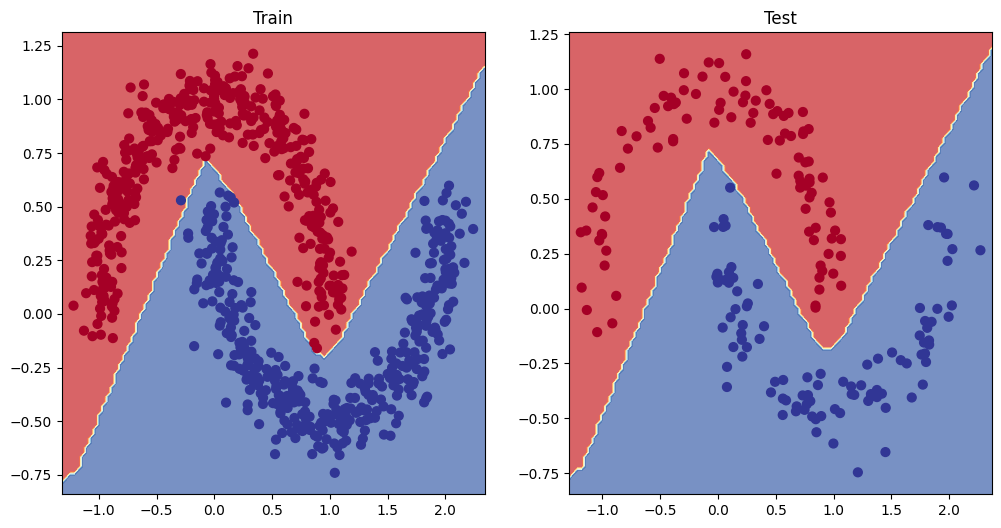

In [92]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model0, X_test, y_test)